<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
import os
 
import pandas as pd
import numpy as np

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# LDA libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

nlp = spacy.load("en_core_web_lg")
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip')

# Removed warning that is irrelevant to us and cluters
import warnings

warnings.filterwarnings(
    'ignore',
    'detected Windows; aliasing chunkize to chunkize_serial',
)

C:\ProgramData\Anaconda3\envs\U4-S1-NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
df1 = df[['brand', 'reviews.text']]
df1.head()

,brand,reviews.text
0,Amazonbasics,I order 3 of them and one of the item is bad q...
1,Amazonbasics,Bulk is always the less expensive way to go fo...
2,Amazonbasics,Well they are not Duracell but for the price i...
3,Amazonbasics,Seem to work as well as name brand batteries a...
4,Amazonbasics,These batteries are very long lasting the pric...


In [13]:
def get_lemmas(text):
    
    words = ['batteries','I', 'amazon', 'i',
             'Amazon', 'it', "it's", 'it.', 'the', 'this',]
    STOP_WORDS = nlp.Defaults.stop_words.union(words)
    
    doc = nlp(text)
    
    doc_tokens = []

    lemmas = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) and ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
#             doc_tokens.append(token.text.lower())

#         if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
#             lemmas.append(token.lemma_)
    
    return lemmas

In [ ]:
# STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])

# tokens = []

# for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
#     doc_tokens = []
    
#     for token in doc: 
#         if token.text.lower() not in STOP_WORDS:
#             doc_tokens.append(token.text.lower())
   
#     tokens.append(doc_tokens)
    
# df['tokens'] = tokens

In [14]:
df1['lemmas'] = df['reviews.text'].apply(get_lemmas)

C:\ProgramData\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df1.lemmas.head()

0    [order, 3, item, bad, quality, miss, backup, s...
1                [Bulk, expensive, way, product, like]
2                             [Duracell, price, happy]
3                           [work, brand, well, price]
4                           [long, last, price, great]
Name: lemmas, dtype: object

In [9]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [19]:
wc = count(df1['lemmas'])

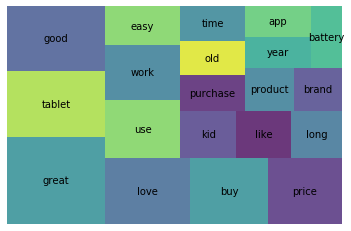

In [20]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [28]:
id2word = corpora.Dictionary(df1.lemmas)

In [29]:
id2word.token2id['battery']

4

In [30]:
id2word[4]

'battery'

In [31]:
len(id2word.keys())

9754

In [42]:
id2word.filter_extremes(no_below=20, no_above=0.98)

In [43]:
len(id2word.keys())

1353

In [44]:
corpus = [id2word.doc2bow(text) for text in df1.lemmas]

In [46]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

In [47]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"----------- Topic {id} -----------")
    print(t)

----------- Topic 0 -----------
love old game year play
----------- Topic 1 -----------
use tablet internet great want
----------- Topic 2 -----------
screen size device tablet like
----------- Topic 3 -----------
easy love use buy gift
----------- Topic 4 -----------
great price product work gift
----------- Topic 5 -----------
charge time battery buy long
----------- Topic 6 -----------
good great price value battery
----------- Topic 7 -----------
tablet kid love great year
----------- Topic 8 -----------
Kindle Fire tablet buy fire
----------- Topic 9 -----------
come warranty like cheap box
----------- Topic 10 -----------
work fine use problem buy
----------- Topic 11 -----------
tablet app great card game
----------- Topic 12 -----------
brand long buy price good
----------- Topic 13 -----------
recommend product quality definitely highly
----------- Topic 14 -----------
kindle app read book download


In [48]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\ProgramData\Anaconda3\envs\U4-S1-NLP\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12     0.210122 -0.120334       1        1  9.886848
0     -0.221743  0.052386       2        1  7.975046
3     -0.182637  0.052325       3        1  7.898250
7     -0.136301  0.129086       4        1  7.873233
8     -0.088881 -0.044369       5        1  7.801641
2     -0.081498 -0.056162       6        1  7.382636
10     0.113049 -0.199217       7        1  7.267706
11    -0.166692  0.028273       8        1  7.219552
5      0.094199 -0.214804       9        1  6.424872
1     -0.081129  0.017792      10        1  6.242866
6      0.293098  0.163296      11        1  6.027953
4      0.174647  0.205838      12        1  5.778507
14    -0.124196 -0.077493      13        1  4.592634
9      0.066367 -0.040903      14        1  3.917782
13     0.131594  0.104285      15        1  3.710465, topic_info=     Category         Freq         Term        Total  loglift  logprob
28    Default  6816.000000         good  6816.000000  30.0000  30.0000
18    Default  8914.000000        great  8914.000000  29.0000  29.0000
15    Default  5060.000000        price  5060.000000  28.0000  28.0000
1148  Default  7350.000000       tablet  7350.000000  27.0000  27.0000
76    Default  5900.000000         love  5900.000000  26.0000  26.0000
8     Default  4589.000000         work  4589.000000  25.0000  25.0000
153   Default  2896.000000          kid  2896.000000  24.0000  24.0000
136   Default  1374.000000    recommend  1374.000000  23.0000  23.0000
27    Default  3170.000000         easy  3170.000000  22.0000  22.0000
16    Default  2166.000000        brand  2166.000000  21.0000  21.0000
1059  Default  1413.000000       kindle  1413.000000  20.0000  20.0000
884   Default  2365.000000          app  2365.000000  19.0000  19.0000
11    Default  2376.000000      product  2376.000000  18.0000  18.0000
242   Default  1242.000000         come  1242.000000  17.0000  17.0000
145   Default  1867.000000         game  1867.000000  16.0000  16.0000
396   Default  2441.000000          old  2441.000000  15.0000  15.0000
180   Default  1127.000000       charge  1127.000000  14.0000  14.0000
934   Default  1736.000000       screen  1736.000000  13.0000  13.0000
561   Default  2031.000000         read  2031.000000  12.0000  12.0000
20    Default  2529.000000         long  2529.000000  11.0000  11.0000
780   Default  1840.000000         book  1840.000000  10.0000  10.0000
325   Default  1468.000000         play  1468.000000   9.0000   9.0000
87    Default  2227.000000         year  2227.000000   8.0000   8.0000
310   Default   975.000000        value   975.000000   7.0000   7.0000
79    Default  4760.000000          use  4760.000000   6.0000   6.0000
7     Default  1343.000000      quality  1343.000000   5.0000   5.0000
1205  Default  1679.000000       Kindle  1679.000000   4.0000   4.0000
3     Default  2056.000000      battery  2056.000000   3.0000   3.0000
111   Default  1192.000000         gift  1192.000000   2.0000   2.0000
871   Default  1207.000000         Fire  1207.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
938   Topic15    26.720243         fill    49.921265   2.6690  -5.9923
206   Topic15    11.768083      earlier    22.157719   2.6612  -6.8123
784   Topic15    38.462570        piece    72.562469   2.6593  -5.6280
609   Topic15    30.434216      general    58.052013   2.6482  -5.8622
864   Topic15   118.880508        adult   230.301407   2.6327  -4.4996
470   Topic15    51.897591        solid   107.350128   2.5672  -5.3284
103   Topic15    50.633873         lack   105.968918   2.5555  -5.3531
347   Topic15    52.102261   disappoint   110.247101   2.5445  -5.3245
7     Topic15   399.208466      quality  1343.130493   2.0807  -3.2882
11    Topic15   585.256470      product  2376.823730   1.8925  -2.9057
360   Topic15    93.179337       family   253.053070   2.2949  -4.7432
591

In [61]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, df_column, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    warnings.filterwarnings('ignore')
    
    coherence_values = []
    
    tokens = list(df_column)
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = df_column
            model = LdaMulticore(corpus=corpus,
                                 num_topics=num_topics,
                                 id2word=dictionary,
                                 random_state=723812,
                                 workers=8)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [60]:
# Can take a long time to run.
# warnings.filterwarnings(
#     'ignore',
#     'Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.',
# )

# import warnings

# def fxn():
#     warnings.warn("deprecated", DeprecationWarning)

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fxn()

import warnings
warnings.filterwarnings('ignore')

coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        df_column=df1.lemmas, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=40)

In [62]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [63]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-2.388784,2,0
1,-2.448212,8,0
2,-2.508028,14,0
3,-2.433123,20,0
4,-2.459012,26,0


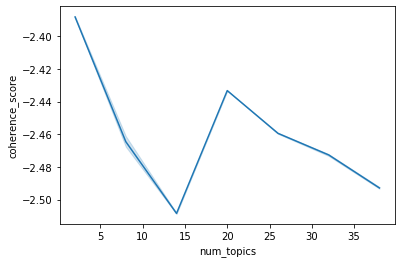

In [64]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [65]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

NameError: name 'x' is not defined

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling